In [40]:
import pandas as pd
import glob
from functools import reduce
    
def merge_csv_files(input_files, output_file_name):

    # Merge multiple CSV files in a folder into a single CSV file

    df_list = []

    for filename in input_files:
        df = pd.read_csv(filename, index_col=None, header=0, dtype = 'object', encoding= 'latin1')
        df_list.append(df)

    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['VAERS_ID'],
                                            how='outer'), df_list) 
    
    #combined_df.to_csv(output_file_name, index=False)
    #print(df_list)
    
    pd.DataFrame.to_csv(df_merged, output_file_name, sep=',', na_rep='void', index=False)
   
merge_csv_files(["2021VAERSVAX.csv", "2022VAERSVAX.csv","2021VAERSSYMPTOMS.csv", "2022VAERSSYMPTOMS.csv"], "VAERS_ALL.csv")

In [66]:
pip install --user -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.5 MB/s eta 0:00:0000:0100:010m
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [21]:
# merging files (for presentation)
dfsym = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfsym = dfsym.head()

df = dfsym[['SYMPTOM3']]

print(df)

                   SYMPTOM3
0  SARS-CoV-2 test negative
1                       NaN
2                       NaN
3         Pain in extremity
4        Mobility decreased


In [33]:
# downloads for lemmatizing data

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matthew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/matthew/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /Users/matthew/nltk_data...


True

In [104]:
# cleaning data (for presentation) and lemmatization example

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# adding new stop words
new_stopwords = ['non', 'could', 'within']
en_stop = en_stop.extend(new_stopwords)

# Create p_stemmer of class PorterStemmer
#p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

lemmatizer = WordNetLemmatizer()

# list for tokenized documents in loop
texts = []

# reading files
dfdat1 = pd.read_csv('2021VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax1 = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfdat2 = pd.read_csv('2022VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax2 = pd.read_csv('2022VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfdat1 = dfdat1.head()
dfdat2 = dfdat2.head()
dfvax1 = dfvax1.head()
dfvax2 = dfvax2.head()

# merging dataframes
df1_merged = dfvax1.merge(dfdat1, how = 'outer', on = 'VAERS_ID')
df2_merged = dfvax2.merge(dfdat2, how = 'outer', on = 'VAERS_ID')

df = pd.concat([df1_merged, df2_merged], axis=0)

df = df.loc(axis=1)['VAX_MANU','SYMPTOM_TEXT']

# extracting top 5 manufacturers
dfpbt = df[df['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)

# fill empty cells
dfpbt = dfpbt.fillna('the')

# change type to string
dfpbt = dfpbt.astype(str)

for i in dfpbt.SYMPTOM_TEXT:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens    
    letter_tokens = [i for i in stopped_tokens if not any(filter(str.isdigit, i))]
    
    # stem tokens
    #stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(lemma_tokens)

# prints list vertically instead of horizontally
for i in texts:
    print(i)


['right', 'side', 'epiglottis', 'swelled', 'hinder', 'swallowing', 'picture', 'taken', 'benadryl', 'tylenol', 'taken']
['extreme', 'fatigue', 'dizziness', 'could', 'lift', 'left', 'arm', 'hour']
['irregular', 'menstrual', 'cycle', 'period', 'extremely', 'heavy', 'bad', 'cramping', 'spontaneous', 'report', 'received', 'contactable', 'reporter', 'hcp', 'reporter', 'patient', 'year', 'old', 'female', 'patient', 'pregnant', 'received', 'administered', 'arm', 'left', 'administration', 'date', 'lot', 'number', 'age', 'year', 'dose', 'single', 'covid', 'immunisation', 'patient', 'relevant', 'medical', 'history', 'concomitant', 'medication', 'included', 'zoloft', 'ortho', 'tri', 'cyclen', 'lo', 'vaccination', 'history', 'included', 'dose', 'lot', 'time', 'vaccine', 'location', 'left', 'arm', 'administration', 'date', 'patient', 'year', 'old', 'covid', 'immunization', 'following', 'information', 'reported', 'menstruation', 'irregular', 'non', 'serious', 'onset', 'outcome', 'recovering', 'descri

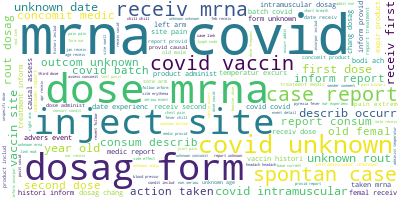

In [121]:
# Wordcloud Generator

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models


tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# adding new stop words
new_stopwords = ['could', 'within', 'us', 'doctor', 'medical', 'day', 'moderna', 'pfizer', 'patient', 'vaccine', 
                 'report', 'gsk', 'janssen', 'merck', 'get', 'got', 'lot']
en_stop.extend(new_stopwords)

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# reading files
dfdat1 = pd.read_csv('2021VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax1 = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfdat2 = pd.read_csv('2022VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax2 = pd.read_csv('2022VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

# merging dataframes
df1_merged = dfvax1.merge(dfdat1, how = 'outer', on = 'VAERS_ID')
df2_merged = dfvax2.merge(dfdat2, how = 'outer', on = 'VAERS_ID')

df = pd.concat([df1_merged, df2_merged], axis=0)

df = df.loc(axis=1)['VAX_MANU','SYMPTOM_TEXT']

# extracting top 5 manufacturers
#dfpbt = df[df['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)
#dfgsk = df[df['VAX_MANU'] == 'GLAXOSMITHKLINE BIOLOGICALS'].reset_index(drop=True)
#dfjanssen = df[df['VAX_MANU'] == 'JANSSEN'].reset_index(drop=True)
#dfmerck = df[df['VAX_MANU'] == 'MERCK & CO. INC.'].reset_index(drop=True)
dfmoderna = df[df['VAX_MANU'] == 'MODERNA'].reset_index(drop=True)

# replace empty cells with stopword
dfmoderna = dfmoderna.replace('void', 'the')
dfmoderna = dfmoderna.fillna('the')

# change type to string
dfmoderna = dfmoderna.astype(str)

for i in dfmoderna.SYMPTOM_TEXT:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens    
    letter_tokens = [i for i in stopped_tokens if not any(filter(str.isdigit, i))]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # lemmatize tokens
    #lemma_tokens = [lemmatizer.lemmatize(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# Import the wordcloud library
from wordcloud import WordCloud
import os
from os import path

# Converts arrray to txt file
with open("wordcloud.txt", "w") as txt_file:
    for line in texts:
        txt_file.write(" ".join(line) + "\n") # works with any number of elements in a line

#open text file in read mode
text_file = open("wordcloud.txt", "r")

#read whole file to a string
data = text_file.read()

#close file
text_file.close()        
        
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(data)
# Visualize the word cloud
wordcloud.to_image()


In [122]:
# LDA Topic Modeling for top 5 reporting firms (using gensim)

import pandas as pd
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# adding new stop words
new_stopwords = ['could', 'within', 'us', 'doctor', 'medical', 'day', 'moderna', 'pfizer', 'patient', 'vaccine', 
                 'report', 'gsk', 'janssen', 'merck', 'get', 'got', 'lot']
en_stop.extend(new_stopwords)

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# reading files
dfdat1 = pd.read_csv('2021VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax1 = pd.read_csv('2021VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfdat2 = pd.read_csv('2022VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfvax2 = pd.read_csv('2022VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

# merging dataframes
df1_merged = dfvax1.merge(dfdat1, how = 'outer', on = 'VAERS_ID')
df2_merged = dfvax2.merge(dfdat2, how = 'outer', on = 'VAERS_ID')

df = pd.concat([df1_merged, df2_merged], axis=0)

# extracting desired columns
df = df.loc(axis=1)['VAX_MANU','SYMPTOM_TEXT']

# extracting manufacturer data
dfpbt = df[df['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)
#dfgsk = df[df['VAX_MANU'] == 'GLAXOSMITHKLINE BIOLOGICALS'].reset_index(drop=True)
#dfjanssen = df[df['VAX_MANU'] == 'JANSSEN'].reset_index(drop=True)
#dfmerck = df[df['VAX_MANU'] == 'MERCK & CO. INC.'].reset_index(drop=True)
#dfmoderna = df[df['VAX_MANU'] == 'MODERNA'].reset_index(drop=True)

# new dataframe of just top 5
#dfnew = pd.concat([dfpbt, dfgsk, dfjanssen, dfmerck, dfmoderna], axis=0)

# replace empty cells with stopword
dfpbt = dfpbt.replace('void', 'the')
dfpbt = dfpbt.fillna('the')

# change type to string
dfnew = dfnew.astype(str)

# loop through document list
for i in dfpbt.SYMPTOM_TEXT:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens    
    letter_tokens = [i for i in stopped_tokens if not any(filter(str.isdigit, i))]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # lemmatize tokens
    #lemma_tokens = [lemmatizer.lemmatize(i) for i in letter_tokens]

    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=10)
print(ldamodel.print_topics(num_topics=10, num_words=5))



[(0, '0.063*"covid" + 0.033*"year" + 0.031*"treatment" + 0.031*"ongo" + 0.027*"dose"'), (1, '0.031*"rash" + 0.020*"eye" + 0.018*"ear" + 0.016*"left" + 0.016*"right"'), (2, '0.018*"state" + 0.017*"like" + 0.016*"shot" + 0.013*"went" + 0.013*"take"'), (3, '0.064*"day" + 0.041*"week" + 0.040*"symptom" + 0.031*"sever" + 0.025*"month"'), (4, '0.035*"heart" + 0.032*"pt" + 0.030*"breath" + 0.020*"chest" + 0.016*"minut"'), (5, '0.050*"fever" + 0.050*"headach" + 0.040*"fatigu" + 0.031*"cough" + 0.027*"chill"'), (6, '0.141*"pain" + 0.077*"arm" + 0.043*"site" + 0.042*"left" + 0.038*"inject"'), (7, '0.049*"dose" + 0.036*"bival" + 0.033*"receiv" + 0.030*"given" + 0.028*"booster"'), (8, '0.056*"covid" + 0.053*"report" + 0.042*"unknown" + 0.036*"number" + 0.034*"inform"'), (9, '0.042*"covid" + 0.033*"test" + 0.033*"posit" + 0.030*"note" + 0.018*"hospit"')]


In [95]:
# LDA Modeling for Age Ranges for different years

import pandas as pd 
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import gensim
from gensim import corpora, models

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = nltk.corpus.stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem

# list for tokenized documents in loop
texts = []

# filling empty cells in SYMPTOMS
dfsym = pd.read_csv('2021VAERSSYMPTOMS.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfsym = dfsym.fillna('the')

# grouping symptoms with mulitple IDs
dfsym = dfsym.groupby(by=['VAERS_ID'], dropna=False).agg(lambda x: ', '.join(x))

# filling in empty cells in DATA
dfdata = pd.read_csv('2021VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfdata = dfdata.fillna(-1)

# merging dataframes
dfmerged = dfdata.merge(dfsym, how = 'outer', on = 'VAERS_ID')
df = dfmerged[['AGE_YRS','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

# filling extra cells (because VAERS ID are not consistent across files)
df = df.fillna(-1)

# retyping age data as integers
df['AGE_YRS'] = df['AGE_YRS'].astype(float)
df['AGE_YRS'] = df['AGE_YRS'].astype(int)

# extracting age range
dfage = df[(df['AGE_YRS'] < -0.25) & (df['AGE_YRS'] > -10)]

# change type to string
dfnew = dfage.astype(str)

# loop through document list
for i in dfnew.SYMPTOM1:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

for i in dfnew.SYMPTOM2:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM3:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM4:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)
    
for i in dfnew.SYMPTOM5:
    
  # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop] 
    
    # remove numbers from tokens
    letter_tokens = [i for i in stopped_tokens if not i.isdigit()]
    
    # stem tokens
    stemmed_tokens = [p_stemmer(i) for i in letter_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word = dictionary, passes=10)
print(ldamodel.print_topics(num_topics=10, num_words=5))

[(0, '0.143*"vomit" + 0.110*"urticaria" + 0.078*"hyperhidrosi" + 0.069*"immunis" + 0.051*"vertigo"'), (1, '0.210*"swell" + 0.133*"myalgia" + 0.084*"pruritu" + 0.066*"discomfort" + 0.052*"skin"'), (2, '0.327*"vaccin" + 0.232*"site" + 0.168*"headach" + 0.039*"failur" + 0.033*"dyspnoea"'), (3, '0.499*"pain" + 0.154*"extrem" + 0.048*"decreas" + 0.041*"paraesthesia" + 0.025*"lymphadenopathi"'), (4, '0.180*"rash" + 0.124*"site" + 0.084*"inject" + 0.063*"erythema" + 0.056*"warmth"'), (5, '0.236*"product" + 0.078*"bodi" + 0.075*"issu" + 0.049*"drug" + 0.048*"dose"'), (6, '0.126*"test" + 0.091*"sar" + 0.091*"cov" + 0.063*"blood" + 0.033*"count"'), (7, '0.086*"fatigu" + 0.079*"disord" + 0.071*"malais" + 0.064*"rate" + 0.059*"heart"'), (8, '0.107*"omiss" + 0.103*"tast" + 0.101*"inflamm" + 0.076*"sneez" + 0.067*"death"'), (9, '0.362*"pyrexia" + 0.121*"nausea" + 0.068*"abnorm" + 0.065*"feel" + 0.061*"ill"')]


In [49]:
import pandas as pd

dfvax = pd.read_csv('2022VAERSVAX.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')
dfdata = pd.read_csv('2022VAERSDATA.csv', index_col=None, header=0, dtype = 'object', encoding= 'latin1')

dfmerged = pd.concat([dfvax, dfdata], axis=1)

# replace empty cells with -1
df_age = dfmerged.fillna(-1)

# change dtype of list
df_age['AGE_YRS'] = df_age['AGE_YRS'].astype(float)
df_age['AGE_YRS'] = df_age['AGE_YRS'].astype(int)

# extracting age data for each company
dfpbt = df_age[df_age['VAX_MANU'] == 'PFIZER\BIONTECH'].reset_index(drop=True)
dfgsk = df_age[df_age['VAX_MANU'] == 'GLAXOSMITHKLINE BIOLOGICALS'].reset_index(drop=True)
dfjanssen = df_age[df_age['VAX_MANU'] == 'JANSSEN'].reset_index(drop=True)
dfmerck = df_age[df_age['VAX_MANU'] == 'MERCK & CO. INC.'].reset_index(drop=True)
dfmoderna = df_age[df_age['VAX_MANU'] == 'MODERNA'].reset_index(drop=True)

# creating bins for age range and placing data into bins
pbt_age = pd.cut(dfpbt['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
gsk_age = pd.cut(dfgsk['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
janssen_age = pd.cut(dfjanssen['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
merck_age = pd.cut(dfmerck['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)
moderna_age = pd.cut(dfmoderna['AGE_YRS'], [-10,0,12,18,30,50,70,120], include_lowest=True)

#counting data
pbt_age_count = pbt_age.value_counts()
gsk_age_count = gsk_age.value_counts()
janssen_age_count = janssen_age.value_counts()
merck_age_count = merck_age.value_counts()
moderna_age_count = moderna_age.value_counts()

# creating new dataframe
dfage_merged = pd.concat([pbt_age_count, moderna_age_count, gsk_age_count, merck_age_count, janssen_age_count], axis=1)

dfage_merged.columns.values[0] = "PfizerBioNTech"
dfage_merged.columns.values[1] = "GSK"
dfage_merged.columns.values[2] = "Janssen"
dfage_merged.columns.values[3] = "Merck"
dfage_merged.columns.values[4] = "Moderna"
dfage_merged.head()

,PfizerBioNTech,GSK,Janssen,Merck,Moderna
"(50.0, 70.0]",31393,25504,3378,2425,2471
"(-10.001, 0.0]",29671,24768,4777,2616,2154
"(30.0, 50.0]",20706,16668,2013,1393,1726
"(70.0, 120.0]",18503,14806,2093,1479,1383
"(0.0, 12.0]",8537,6726,944,681,564


In [39]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

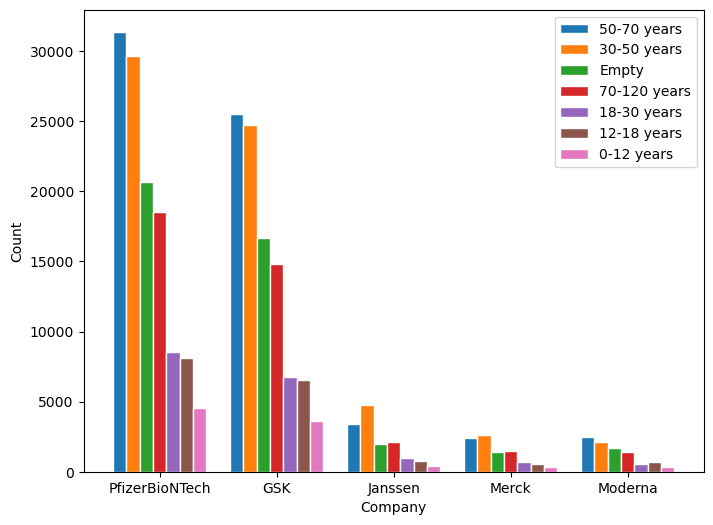

In [50]:
dfage_mergedT = dfage_merged.transpose()
plot2 = dfage_mergedT.plot.bar(rot=0, width = 0.8, figsize = (8,6), edgecolor='white', linewidth=1)

plot2.legend(["50-70 years", "30-50 years", 'Empty', '70-120 years', '18-30 years', '12-18 years', '0-12 years']);
plot2.set_xlabel('Company');
plot2.set_ylabel('Count');
#plot2.set_title('2022 Age Distribution');

In [30]:
# Merge duplicates into same cell

df = pd.read_csv("2023VAERSVAX.csv", index_col=None, header=0, dtype = 'object', encoding= 'latin1')
df = df.fillna('void')

test = df.groupby(by=['VAERS_ID'], dropna=False).agg(lambda x: ', '.join(x))

#print(test.head())

In [34]:
# removes everything after first comma in list (probably won't need)
df = pd.read_csv("2023VAERS_ALL.csv", index_col=None, header=0, dtype = 'object', encoding= 'latin1')

df['VAX_MANU'] = df['VAX_MANU'].str.split(',').str[0]
